# 總市值前100名的虛擬貨幣

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# 將爬蟲偽裝成Browser
url = "https://www.coingecko.com/zh-tw"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
r = requests.get(url, headers = url_headers)
print(r.status_code)  # status code為200，表示網頁回應正確

200


In [3]:
# 剖析網頁元素，將我們要抓取的資料取出
soup = BeautifulSoup(r.text, "lxml")
table = soup.find(attrs={"class":"sort table mb-0 text-sm text-lg-normal table-scrollable"})

In [4]:
# 將tag <tr>的資料出
trs = table.tbody.find_all("tr")
df = []
columnName = ['#','貨幣','代號', '匯率','1小時','24小時','7天','24小時交易量','總市值']
# 以form迴圈將資料逐筆取出
for tr in trs:
    tds = tr.find_all("td")
    tmp = []
    for idx in range(10):
        if (idx == 2):
            tmp.append(tds[idx].find_all("span")[1].string)
            tmp.append(tds[idx].find_all("span")[2].string)  
        elif (idx != 0 and idx != 8):
            tmp.append(tds[idx].span.string)     
    df.append(tmp)    
# 將資料轉為DataFrame，秀出前10筆
df = pd.DataFrame(df, columns = columnName)
print("總筆數:", len(df))
df.head(10)    # 顯示前10筆

總筆數: 100


,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
0,1,比特幣,BTC,"$9,873.29",1.8%,-1.6%,3.5%,"$42,036,840,078","$176,143,309,481"
1,2,以太幣,ETH,$214.78,3.5%,1.4%,7.4%,"$8,147,345,399","$22,984,001,174"
2,3,瑞波幣,XRP,$0.312962,2.4%,0.77%,5.1%,"$1,935,229,278","$13,398,606,913"
3,4,萊特幣,LTC,$94.58,4.9%,5.2%,18%,"$10,201,859,302","$5,912,110,369"
4,5,比特現金,BCH,$304.61,4.8%,1.4%,7.4%,"$7,036,632,909","$5,459,596,040"
5,6,柚子幣,EOS,$4.52,6.2%,10%,23%,"$3,684,648,963","$4,597,132,907"
6,7,幣安幣,BNB,$29.04,2.4%,-1.1%,15%,"$283,720,669","$4,516,354,814"
7,8,泰達幣,USDT,$1.00,0.15%,0.070%,-0.26%,"$38,980,429,002","$3,561,304,215"
8,9,Bitcoin SV,BSV,$168.93,3.1%,-0.10%,50%,"$713,681,888","$3,028,195,071"
9,10,艾達幣,ADA,$0.05559035,3.5%,-1.1%,6.7%,"$250,449,486","$1,726,793,715"


In [5]:
df_10 = df.head(10)
coin = df_10['代號']
rate = df_10['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
mpl.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
mpl.rcParams["axes.unicode_minus"] = False

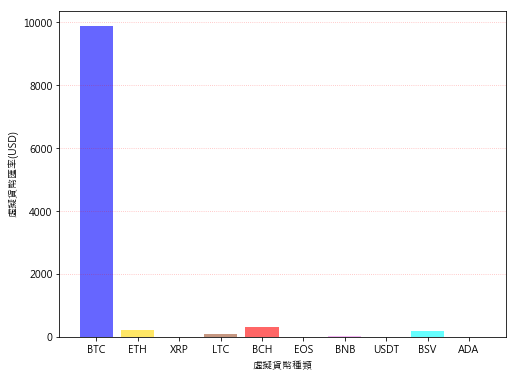

In [8]:
# plot
plt.figure(figsize=(8, 6))

colors = ["blue", "gold", "darkgreen", "sienna", "red", "m", "violet", "blueviolet", "cyan", "cyan"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.xlabel("虛擬貨幣種類")
plt.ylabel("虛擬貨幣匯率(USD)")

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

plt.show()

In [23]:
df.index = df['代號']
idx = ['BTC', 'ETH', 'XRP','LTC', 'MIOTA']
df.loc[idx]

,#,貨幣,代號,匯率,1小時,24小時,7天,24小時交易量,總市值
代號,,,,,,,,,
BTC,1,比特幣,BTC,"$9,873.29",1.8%,-1.6%,3.5%,"$42,036,840,078","$176,143,309,481"
ETH,2,以太幣,ETH,$214.78,3.5%,1.4%,7.4%,"$8,147,345,399","$22,984,001,174"
XRP,3,瑞波幣,XRP,$0.312962,2.4%,0.77%,5.1%,"$1,935,229,278","$13,398,606,913"
LTC,4,萊特幣,LTC,$94.58,4.9%,5.2%,18%,"$10,201,859,302","$5,912,110,369"
MIOTA,20,埃歐塔,MIOTA,$0.304047,0.95%,2.9%,13%,"$14,604,439","$845,619,444"


In [28]:
coin = df.loc[idx]['代號']
rate = df.loc[idx]['匯率']
rate = [float(r.replace("$", "").replace(",","")) for r in rate]

In [29]:
rate

[9873.29, 214.78, 0.312962, 94.58, 0.304047]

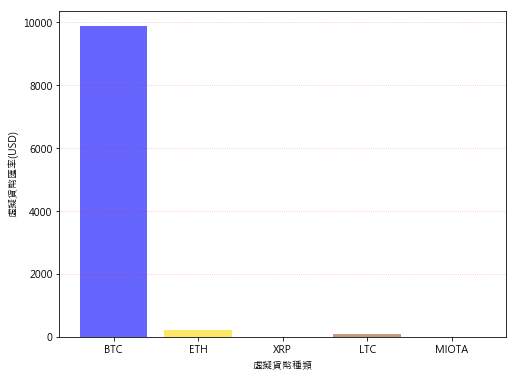

In [30]:
# plot
plt.figure(figsize=(8, 6))

colors = ["blue", "gold", "darkgreen", "sienna", "red"]

plt.bar(coin, rate, align="center", color=colors, tick_label=coin, alpha=0.6)

plt.xlabel("虛擬貨幣種類")
plt.ylabel("虛擬貨幣匯率(USD)")

plt.grid(True, axis="y", ls=":", color="r", alpha=0.3)

plt.show()